# Part I - Prosper Loan Data
## by Fedi Haddadi

## Introduction
> This document explores a dataset containing attributes for approximately 114,000 loans.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv("prosperLoanData.csv")

In [3]:
# high-level overview of data shape and composition
print(df.shape)

(113937, 81)


In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

> There are 113,937 loans in the dataset with 81 features ( including loan amount, borrower rate (or interest rate), current loan status, borrower income, Investors...)

### What is/are the main feature(s) of interest in your dataset?

> We will be interested in studying the attributes that helps predict the rate of return.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the Borrower rate, Prosper Score, IncomeRange,term and Investors will have the most influence in predicting the rate of return. 	

## Univariate Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
df=df[df.EstimatedReturn.notnull()]

We will be looking at our variable of interest: The Estimated Return

In [7]:
df.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

#### what is the distribution of the estimated return?

In [9]:
def dist_plot(column):
    sns.kdeplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Distribution of {}'.format(column));

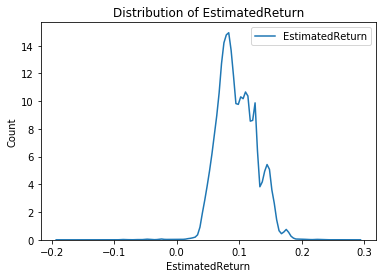

In [10]:
dist_plot('EstimatedReturn')

The dominant mojority of the rates are between 0% and 20%

(0, 0.2)

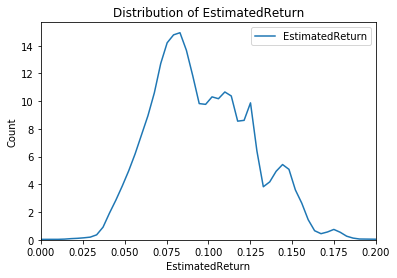

In [11]:
dist_plot('EstimatedReturn')
plt.xlim(0, .2)

the distrubution shows that the largest number of Rates falls between 6.5% and about 8%

#### what is the distribution of the Borrower interest rates?

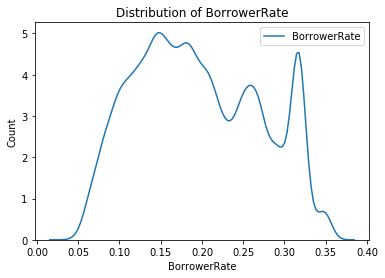

In [12]:
dist_plot('BorrowerRate')

The majority of the rates are between 5% and 25% with a local peak at about 32% 

#### what is the most common loans Prosper Rating?

In [13]:
def_color = sns.color_palette()[0]

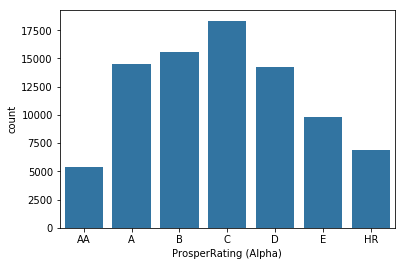

In [14]:
sns.countplot(df['ProsperRating (Alpha)'],order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],color=def_color)

The rating with the most number of loans are C rated loans and AA loans has the smallest number.

#### what is the distribution of the Terms and the Loans Status?

In [15]:
default_color = sns.color_palette()[0]
def count_plot(column):
    sns.countplot(data=df,x=column,color=default_color)
    plt.xlabel(column)
    plt.title('{}.distribution'.format(column))

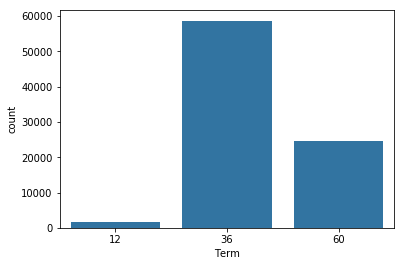

In [17]:
count_plot('Term')

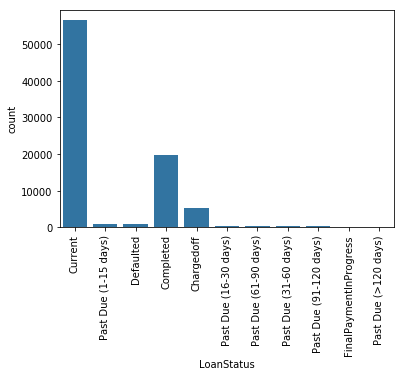

In [18]:
count_plot('LoanStatus')
plt.xticks(rotation=90);

The Absolute majority of the terms are of 36 months and only small proportion of the loans have 1 year term.
Most the loans in the dataset are current loans.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the vaiables are normally distributed with left skew.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>The EstimatedReturn had missing values. Being the variable of interest, we deleted the rows with no Estimated Return info availble.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [19]:
Columns_of_interest=['EstimatedReturn','LoanOriginalAmount', 'BorrowerAPR','Term',
                     'ProsperRating (Alpha)', 'EmploymentStatus','Investors','DebtToIncomeRatio','BorrowerRate']
loan=df[Columns_of_interest]
loan.head()

,EstimatedReturn,LoanOriginalAmount,BorrowerAPR,Term,ProsperRating (Alpha),EmploymentStatus,Investors,DebtToIncomeRatio,BorrowerRate
1,0.05470,10000,0.12016,36,A,Employed,1,0.18,0.0920
3,0.06000,10000,0.12528,36,A,Employed,158,0.15,0.0974
4,0.09066,15000,0.24614,36,D,Employed,20,0.26,0.2085
5,0.07077,15000,0.15425,60,B,Employed,1,0.36,0.1314
6,0.11070,3000,0.31032,36,E,Employed,1,0.27,0.2712


#### Is there a correlation betwwen the different variables of interest?

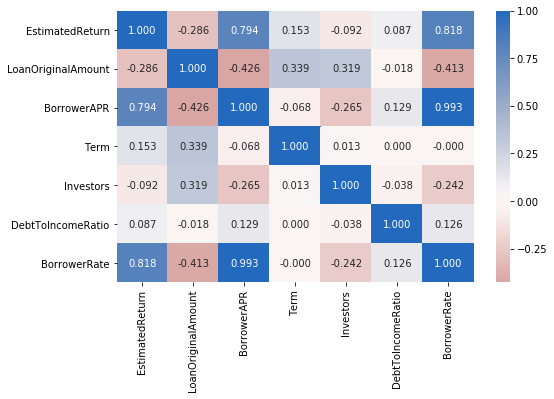

In [18]:
plt.figure(figsize = [8, 5])
sns.heatmap(loan.corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);

There is a strong positive correlation between BorrowerAPR and the Estimated Return.

There is a moderly weak negative correlation between the Loan Original Ammount and the Estimated Return.

There is a positive correlation between Loan Original Ammount/Term and Loan Original Ammount/investor.

There is a negative corrolation between BorrowerRate and Loan Original Ammount.

#### Is there a correlation betwwen the different variables of interest?

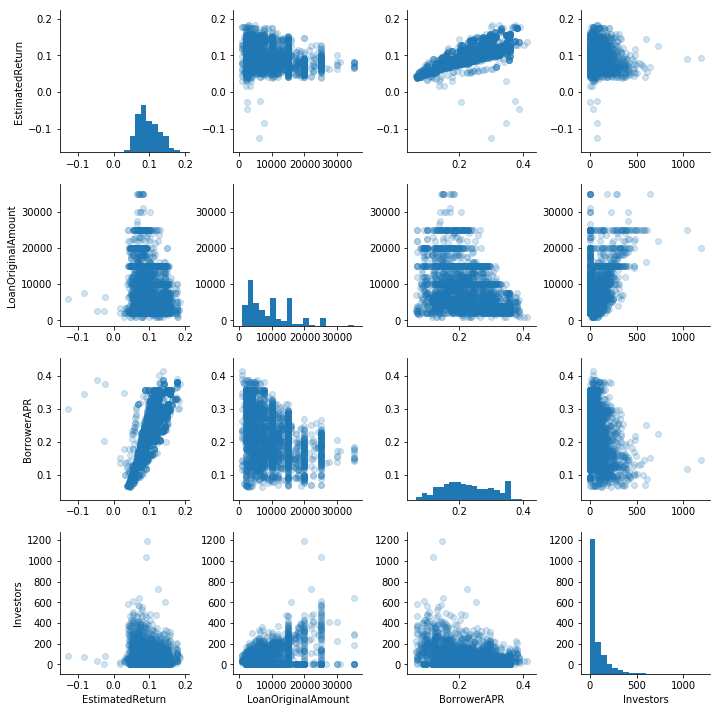

In [19]:
loan_sub_samp = loan.sample(3000)
g = sns.PairGrid(data = loan_sub_samp.dropna(), vars = ['EstimatedReturn','LoanOriginalAmount','BorrowerAPR','Investors'])
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

The scatter Plots shows the same results.

#### Is there a relationship between the EmploymentStatus and the term, ProsperRating (Alpha) and EstimatedReturn.

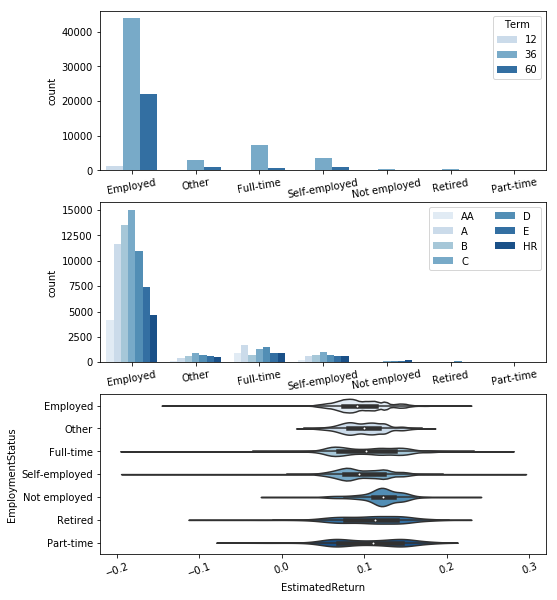

In [20]:
plt.figure(figsize = [8, 10])

ax = plt.subplot(3, 1, 1)
sns.countplot(data = loan, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)

ax = plt.subplot(3, 1, 2)
sns.countplot(data = loan, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues',
             hue_order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])
ax.legend(loc = 1, ncol = 2);
plt.xticks(rotation=10);

plt.subplot(3, 1, 3)
sns.violinplot(data=loan,y='EmploymentStatus',x='EstimatedReturn',palette = 'Blues')
plt.xticks(rotation=20);

The C rated Loans are the the most popular among the employed, self employed. For the full time, it will be the A rated loans. 

we don't have enough data to assess the preferences of the other categories.

The term preferences are similar across all the the employment status categories.

The "not employed" have the highest estimated Return mean and most compact distrubution.

#### Does the loan ammount affects the Estimted return?

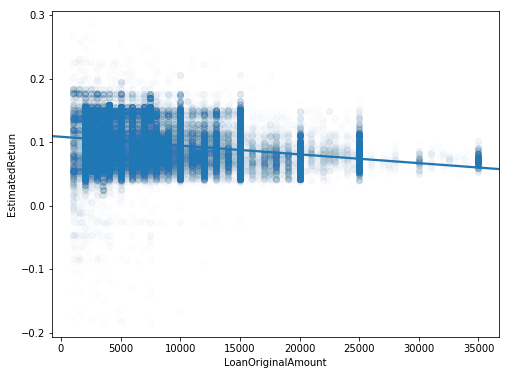

In [21]:
plt.figure(figsize = [8, 6])
sns.regplot(data = loan, x = 'LoanOriginalAmount', y = 'EstimatedReturn', scatter_kws={'alpha':0.01});

The bigger the loan ammount the smaller the Estimated Return. But since the corrolation is weak, the effect is not great.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The greater the BorrowerAPR and Borrower Rate the greater the Estimated Return.

> The greater the Loan Amount, the lower the EstimatedRetun and the borrower APR and the greater the number of the investors.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The Prosper Rating preferences and the estimated return varies across the the Employment status categories.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Is there a relationship between the ProsperRating (Alpha), Borrower APR, and the term?

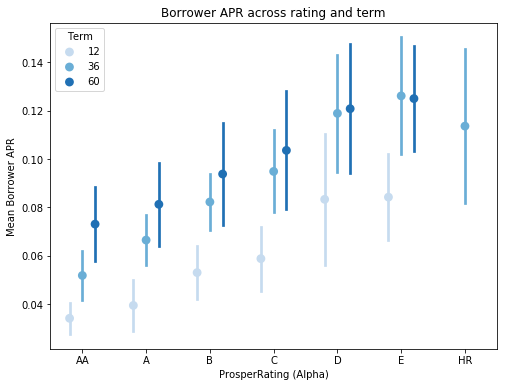

In [33]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = loan, x = 'ProsperRating (Alpha)', y = 'EstimatedReturn', hue = 'Term',
                   order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

The mean Borrower APR decreases when the prosper rating rank moves from AA to E and become bigger the longer the term.

#### Is there a relationship between the LoanOriginalAmount, EstimatedReturn, and the number of investors?

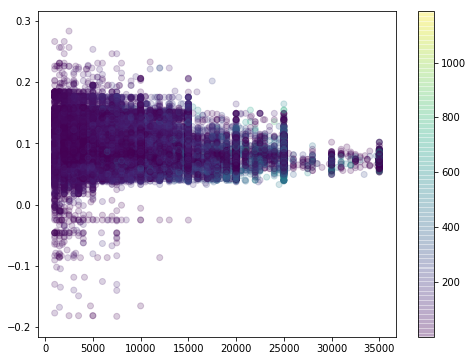

In [32]:
plt.figure(figsize = [8, 6])
plt.scatter(data = loan, x = 'LoanOriginalAmount', y = 'EstimatedReturn', c='Investors',alpha=0.2);
plt.colorbar()

The number of investor increases in the loans of amounts between 20000 and 25000. The number of investors is low in high Return Loans (>20%)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The prosper Rating and the Borrower APR are negativily corrolated.
> The number of investors increases the bigger the loan ammount.

### Were there any interesting or surprising interactions between features?

> The borrower APR increases the greater the loan term. This behavior stay the same across nearly all the prosper rating categories.

## Conclusions
> The greater the BorrowerAPR and Borrower Rate the greater the Estimated Return.

> The greater the Loan Amount, the lower the EstimatedRetun and the borrower APR and the greater the number of the investors.

> The Estimated Return is mostly affected by The borrower APR, Borrower rate ,LoanOriginalAmount and the term with a lesser degree.
